### Stock Market Prediction And Forecasting Using Stacked LSTM

In [3]:
### Keras and Tensorflow >2.0

In [4]:
### Data Collection
import pandas_datareader as pdr
key="ac34b80b87f8d63f4bca45069f5e8c2dc547c397"

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2020-02-03 00:00:00+00:00,308.66,313.49,302.22,304.30,43496401,74.811428,75.982099,73.250534,73.754674,173985604,0.00,1.0
1,AAPL,2020-02-04 00:00:00+00:00,318.85,319.64,313.63,315.31,34154134,77.281228,77.472704,76.016031,76.423221,136616536,0.00,1.0
2,AAPL,2020-02-05 00:00:00+00:00,321.45,324.76,318.95,323.52,29706718,77.911403,78.713664,77.305466,78.413119,118826872,0.00,1.0
3,AAPL,2020-02-06 00:00:00+00:00,325.21,325.22,320.26,322.57,26356385,78.822732,78.825156,77.622977,78.182863,105425540,0.00,1.0
4,AAPL,2020-02-07 00:00:00+00:00,320.03,323.40,318.00,322.37,29421012,77.753859,78.572628,77.260654,78.322381,117684048,0.77,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2025-01-27 00:00:00+00:00,229.86,232.150,223.98,224.020,94863418,229.86,232.150,223.98,224.020,94863418,0.0,1.0
1253,AAPL,2025-01-28 00:00:00+00:00,238.26,240.190,230.81,230.850,75707569,238.26,240.190,230.81,230.850,75707569,0.0,1.0
1254,AAPL,2025-01-29 00:00:00+00:00,239.36,239.855,234.01,234.120,45486100,239.36,239.855,234.01,234.120,45486100,0.0,1.0
1255,AAPL,2025-01-30 00:00:00+00:00,237.59,240.790,237.21,238.665,55658279,237.59,240.790,237.21,238.665,55658279,0.0,1.0
1256,AAPL,2025-01-31 00:00:00+00:00,236.00,247.190,233.44,247.190,101075128,236.00,247.190,233.44,247.190,101075128,0.0,1.0


In [11]:
df1=df.reset_index()['close']

In [12]:
df1

0       308.66
1       318.85
2       321.45
3       325.21
4       320.03
         ...  
1252    229.86
1253    238.26
1254    239.36
1255    237.59
1256    236.00
Name: close, Length: 1257, dtype: float64

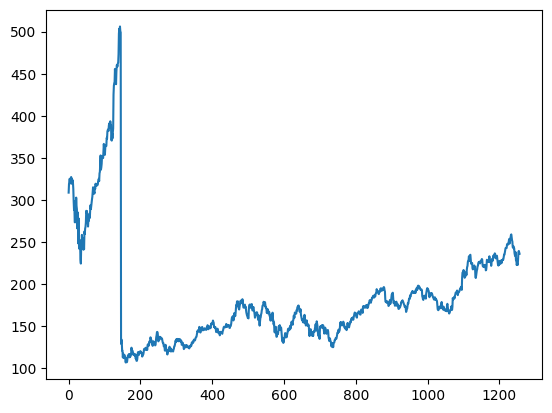

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [15]:
import numpy as np

In [16]:
df1

0       308.66
1       318.85
2       321.45
3       325.21
4       320.03
         ...  
1252    229.86
1253    238.26
1254    239.36
1255    237.59
1256    236.00
Name: close, Length: 1257, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.50549781]
 [0.53102066]
 [0.53753287]
 ...
 [0.33192235]
 [0.32748904]
 [0.32350657]]


In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(817, 440)

In [21]:
train_data

array([[5.05497808e-01],
       [5.31020664e-01],
       [5.37532874e-01],
       [5.46950532e-01],
       [5.33976205e-01],
       [5.37783344e-01],
       [5.32924233e-01],
       [5.51934878e-01],
       [5.46098936e-01],
       [5.46299311e-01],
       [5.31396368e-01],
       [5.42968065e-01],
       [5.34652473e-01],
       [5.16493425e-01],
       [4.79248591e-01],
       [4.53951158e-01],
       [4.65397621e-01],
       [4.17482780e-01],
       [4.17082029e-01],
       [4.80826550e-01],
       [4.57056982e-01],
       [4.90670006e-01],
       [4.66073889e-01],
       [4.56330620e-01],
       [3.99073262e-01],
       [4.47088291e-01],
       [4.22266750e-01],
       [3.54139011e-01],
       [4.28628679e-01],
       [3.39060739e-01],
       [3.65735755e-01],
       [3.50231684e-01],
       [3.45497808e-01],
       [3.06574828e-01],
       [2.94376957e-01],
       [3.50757671e-01],
       [3.47351284e-01],
       [3.79711960e-01],
       [3.52911709e-01],
       [3.70619912e-01],


In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - loss: 0.0312 - val_loss: 0.0055
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - loss: 0.0120 - val_loss: 4.4133e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 0.0124 - val_loss: 4.1829e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - loss: 0.0078 - val_loss: 7.2451e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0103 - val_loss: 3.6674e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0057 - val_loss: 0.0012
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 0.0062 - val_loss: 7.1219e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 0.0057 - val_loss: 0.0011
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 0.0024 - val_loss: 5.6240e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0081 - val_loss: 0.0014
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0073 - val_loss: 0.0016
Epoch 12/100
12/

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.18.0'

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

176.161775179708

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

208.32858002360638

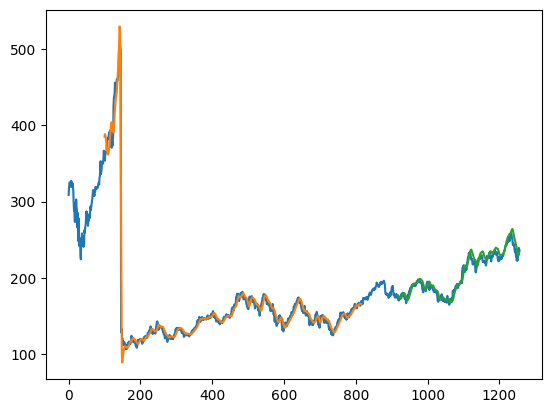

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

440

In [40]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.283706950532248,
 0.29009392611145896,
 0.290369442705072,
 0.2896931747025672,
 0.27421415153412637,
 0.27539135879774573,
 0.28515967438948026,
 0.30564809016906697,
 0.303969943644333,
 0.2996368190356919,
 0.3018910457107075,
 0.2993863494051346,
 0.30226675015654353,
 0.30294301815904817,
 0.31599248591108325,
 0.29898559799624297,
 0.3004132748904195,
 0.29763306199123346,
 0.30046336881653096,
 0.2876643706950532,
 0.2978835316217909,
 0.3073262366938008,
 0.3060738885410143,
 0.3023418910457107,
 0.3117345021916092,
 0.31812147777082017,
 0.3129367564182843,
 0.3138634940513462,
 0.3210018785222291,
 0.3247088290544771,
 0.32315591734502186,
 0.3103819661865998,
 0.3099060738885409,
 0.3120100187852222,
 0.31699436443331247,
 0.3176706324358171,
 0.30872886662492166,
 0.29823418910457106,
 0.29072010018785216,
 0.28846587351283653,
 0.29207263619286156,
 0.29024420788979327,
 0.30216656230432054,
 0.3008641202254226,
 0.29402629931120844,
 0.29402629931120844,
 0.29625547902

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps-1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.33156356]
100
[0.33156356]
101
2 day input [0.29009393 0.29036944 0.28969317 0.27421415 0.27539136 0.28515967
 0.30564809 0.30396994 0.29963682 0.30189105 0.29938635 0.30226675
 0.30294302 0.31599249 0.2989856  0.30041327 0.29763306 0.30046337
 0.28766437 0.29788353 0.30732624 0.30607389 0.30234189 0.3117345
 0.31812148 0.31293676 0.31386349 0.32100188 0.32470883 0.32315592
 0.31038197 0.30990607 0.31201002 0.31699436 0.31767063 0.30872887
 0.29823419 0.2907201  0.28846587 0.29207264 0.29024421 0.30216656
 0.30086412 0.2940263  0.2940263  0.29625548 0.30402004 0.29595492
 0.3035191  0.30417032 0.3059737  0.30477145 0.30815279 0.31566688
 0.32115216 0.32082655 0.32683782 0.33249843 0.34016281 0.3410645
 0.34113964 0.3406387  0.35043206 0.35298685 0.34978084 0.35346274
 0.35388854 0.36117721 0.36728867 0.35368817 0.35804634 0.36981841
 0.37177207 0.37911083 0.38116468 0.37257358 0.36408265 0.3596243
 0.34316844 0.34194114 0.34604884 0.33906074 0.34028804 0.32563557
 0.31949906 0.31669

In [69]:
day_new=np.arange(1,99)
day_pred=np.arange(101,131)

In [70]:
import matplotlib.pyplot as plt

In [71]:
len(df1)

1257

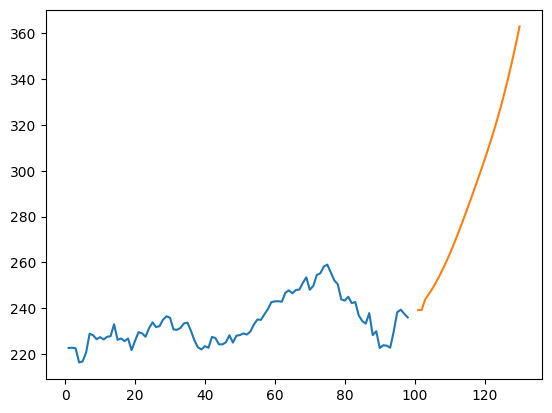

In [72]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

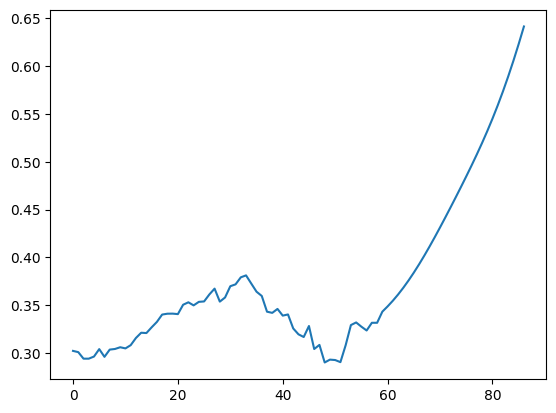

In [73]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [74]:
df3=scaler.inverse_transform(df3).tolist()

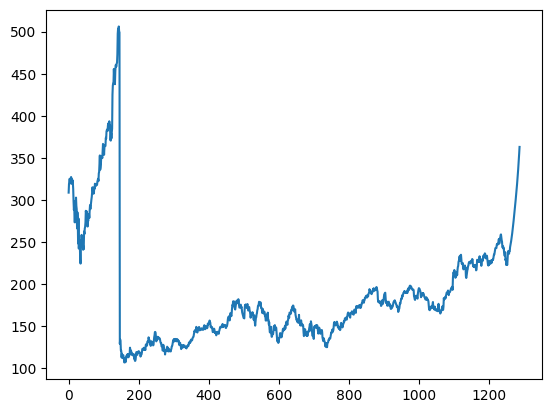

In [75]:
plt.plot(df3)